In [103]:
#Importing Libraries and Packages (Courtesy of Ananconda Assistant)
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Specify the path to your XLSX file
file_path = 'C:\\Users\\seanm\\Downloads\\Bank_Personal_Loan_Modelling.xlsx'

# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)

# Inspect the sheet names
xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)

# Load the 'data' table
loans = pd.read_excel(file_path, sheet_name='Data')  # Replace 'DataSheet' with the actual sheet name containing your data table

# Display the first few rows to ensure it loaded correctly
print(loans.head())

Available sheets: ['Description', 'Data']
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [107]:
# Summary statistics
print(loans.describe())

# Check for missing values
print(loans.isnull().sum())

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000  

In [109]:
#Preprocess the data
# Handle missing values (example: filling with mean or median)
loans.fillna(loans.mean(), inplace=True)

# Define features and target variable
x = loans.drop(['ID', 'Personal Loan'], axis=1)  # 'ID' is likely not needed for prediction, and 'Personal Loan' is the target
y = loans['Personal Loan']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [129]:
y=loans[['Personal Loan']]
x=loans.iloc[:, list(range(10))]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = LogisticRegression(solver='liblinear',random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.90625

In [131]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear')
svm_final=svm_model.fit(x_train,y_train)
print("Accuracy:", svm_final.score(x_train, y_train))

C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.913


In [133]:
#Fit the Logistic Regression Model
# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predict the test set results
y_pred = model.predict(x_test)

C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
#Evaluate the Model
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

# Display the classification report
print(classification_report(y_test, y_pred))

# Get the model coefficients
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display the three most significant variables
print("Three most significant variables:")
print(coefficients.head(3))

# Display the variable with the most negative influence
print("Variable with the most negative influence:")
print(coefficients.tail(1))

Accuracy: 0.97
Precision: 0.90
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       903
           1       0.90      0.82      0.86        97

    accuracy                           0.97      1000
   macro avg       0.94      0.91      0.92      1000
weighted avg       0.97      0.97      0.97      1000

Three most significant variables:
         Feature  Coefficient
9  Personal Loan     3.306047
7      Education     2.113981
5         Family     1.369293
Variable with the most negative influence:
  Feature  Coefficient
6   CCAvg    -0.279847


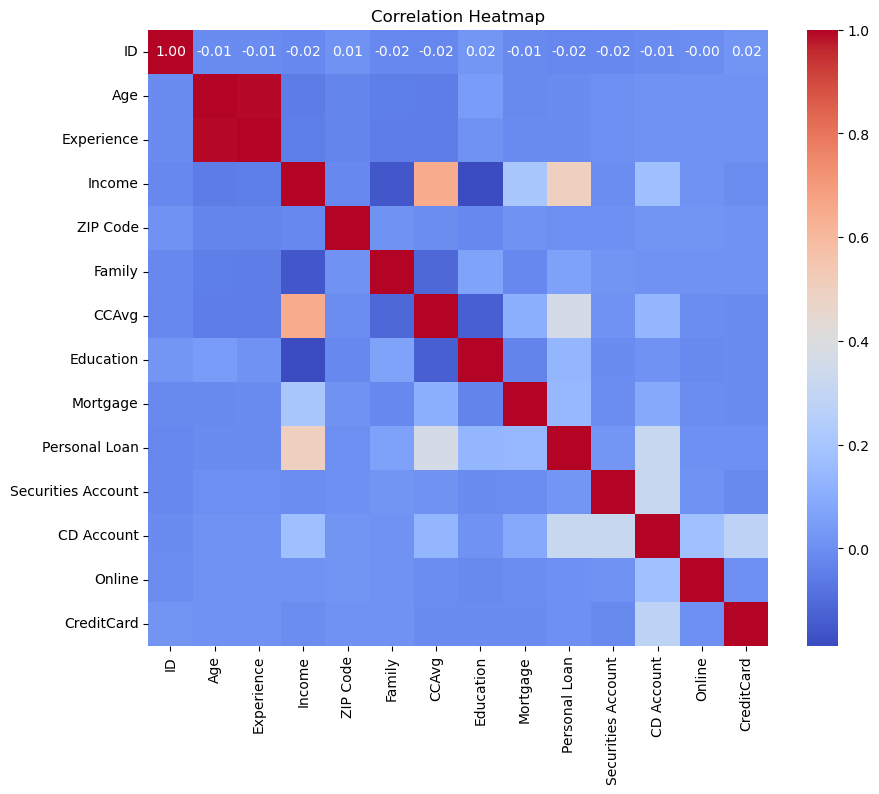

In [137]:
# Calculate the correlation matrix
corr = loans.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

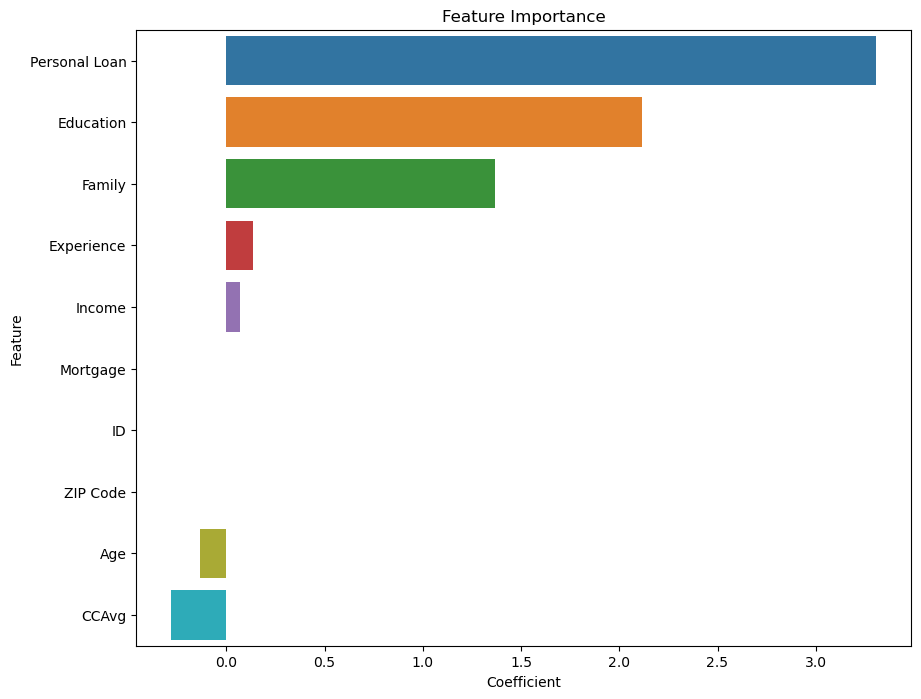

In [139]:
#Feature Importance
# Bar plot of the coefficients
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.show()

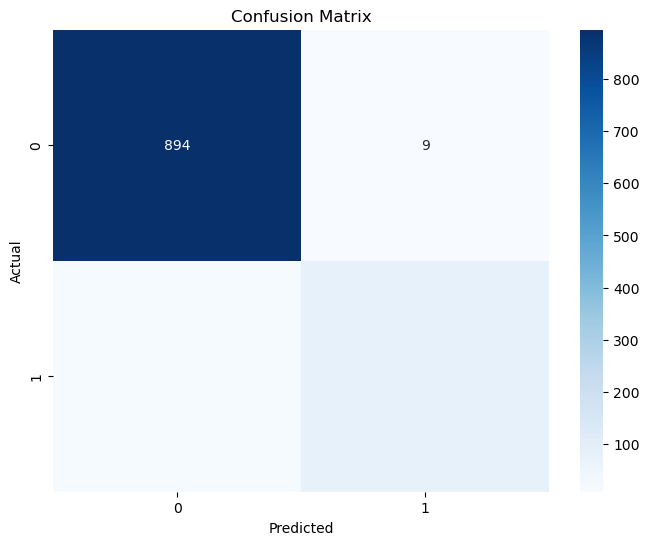

In [141]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()